# AML Project _ US Youtube Trending Videos

In [1]:
import pandas as pd
import numpy as np
import math as m
import random as rand
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import linear_model as lm, metrics, ensemble as ens
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.svm import SVC
from sklearn.feature_selection import RFE, RFECV, SequentialFeatureSelector

## Initial Dataset

In [2]:
#READ IN DATA
df_initial = pd.read_csv("USVideos_initial.csv", )

In [25]:
##CHECK DIMENSION
df_initial.shape

(4547, 23)

In [4]:
#CHECK DATA
df_initial.head()

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
0,2kyS6SvSYSE,2017-11-20,2017-11-13,17,22,CaseyNeistat,2564903,96321,7972,22149,...,False,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7,7,2,2,1,9086142.0
1,1ZAPwfrtAFY,2017-11-20,2017-11-13,7,24,LastWeekTonight,6109402,151250,11508,19820,...,False,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",7,7,65,69,4,5937292.0
2,5qpjK5DgCt4,2017-11-20,2017-11-12,19,23,Rudy Mancuso,5315471,187303,7278,9990,...,True,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,7,8,68,426,23,4191209.0
3,puqaWrEC7tY,2017-11-20,2017-11-13,11,24,Good Mythical Morning,913268,16729,1386,2988,...,True,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,7,7,488,1246,28,13186408.0
4,d380meD0W0M,2017-11-19,2017-11-12,18,24,nigahiga,2819118,153395,2416,20573,...,True,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,6,7,488,1007,14,20563106.0


In [7]:
##CHECK VARIABLES
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4547 entries, 0 to 4546
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   video_id                     4547 non-null   object 
 1   last_trending_date           4547 non-null   object 
 2   publish_date                 4547 non-null   object 
 3   publish_hour                 4547 non-null   int64  
 4   category_id                  4547 non-null   int64  
 5   channel_title                4547 non-null   object 
 6   views                        4547 non-null   int64  
 7   likes                        4547 non-null   int64  
 8   dislikes                     4547 non-null   int64  
 9   comment_count                4547 non-null   int64  
 10  comments_disabled            4547 non-null   bool   
 11  ratings_disabled             4547 non-null   bool   
 12  tag_appeared_in_title_count  4547 non-null   int64  
 13  tag_appeared_in_ti

In [31]:
##CHECK DIMENSION
df_initial.describe()

,publish_hour,category_id,views,likes,dislikes,comment_count,tag_appeared_in_title_count,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
count,4547.000000,4547.000000,4.547000e+03,4.547000e+03,4.547000e+03,4.547000e+03,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4.525000e+03
mean,13.503189,20.416538,1.265665e+06,3.919696e+04,2.616788e+03,4.938788e+03,2.961293,4.830658,34.429954,130.335386,437.941060,19.209369,3.164303e+06
std,6.548420,7.309226,4.526133e+06,1.419793e+05,3.662803e+04,3.110122e+04,2.482547,2.614707,247.514298,150.400756,616.584168,12.452361,4.831613e+06
min,0.000000,1.000000,5.590000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,8.000000,17.000000,9.089650e+04,1.486000e+03,7.600000e+01,2.260000e+02,1.000000,3.000000,5.000000,22.000000,68.000000,9.000000,2.466470e+05
50%,15.000000,24.000000,3.188400e+05,7.397000e+03,2.910000e+02,8.540000e+02,3.000000,5.000000,6.000000,85.000000,217.000000,18.000000,1.198769e+06
75%,18.000000,25.000000,1.006673e+06,2.557550e+04,1.023000e+03,2.862500e+03,4.000000,7.000000,7.000000,151.000000,515.000000,29.000000,3.766915e+06
max,23.000000,43.000000,1.493761e+08,3.093544e+06,1.674420e+06,1.361580e+06,18.000000,14.000000,4215.000000,488.000000,3644.000000,69.000000,2.867694e+07


## EDAV + Preprocessing

In [22]:
#CHECK NA/MISSING VALUES
per_miss = df_initial.isna().sum() * 100 / len(df_initial)
missing_df = pd.DataFrame({'column_name': df_initial.columns,
                            'percent_missing': per_miss})

In [23]:
df_initial.isna().sum()

video_id                         0
last_trending_date               0
publish_date                     0
publish_hour                     0
category_id                      0
channel_title                    0
views                            0
likes                            0
dislikes                         0
comment_count                    0
comments_disabled                0
ratings_disabled                 0
tag_appeared_in_title_count      0
tag_appeared_in_title            0
title                            0
tags                           208
description                     89
trend_day_count                  0
trend.publish.diff               0
trend_tag_highest                0
trend_tag_total                  0
tags_count                       0
subscriber                      22
dtype: int64

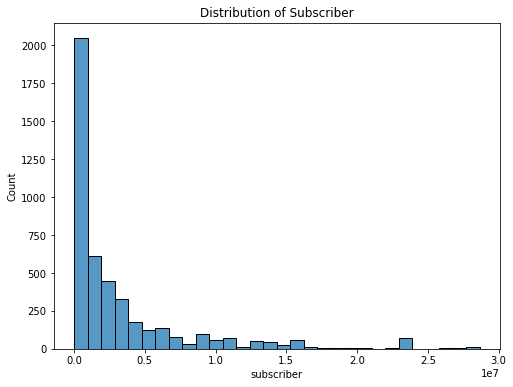

In [39]:
#Subscriber
plt.figure(figsize=(8, 6))
sns.histplot(data=df_initial, x="subscriber", bins=30).set(title='Distribution of Subscriber');

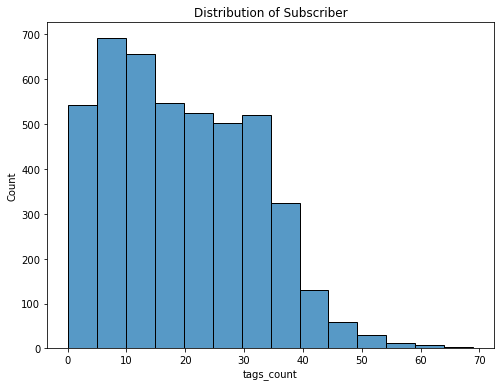

In [38]:
#Number of tags
plt.figure(figsize=(8, 6))
sns.histplot(data=df_initial, x="tags_count", bins=14).set(title='Distribution of Subscriber');

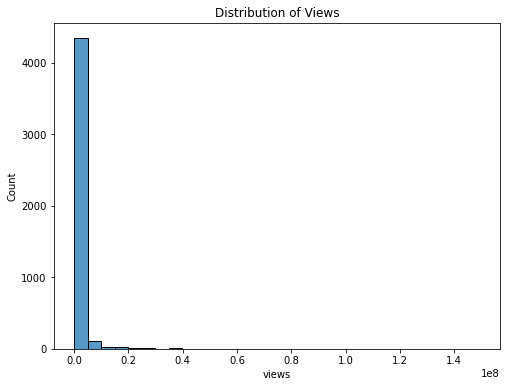

In [49]:
#VIEWS
plt.figure(figsize=(8, 6))
view_hist = sns.histplot(data=df_initial, x="views", bins=30);
view_hist.set(title='Distribution of Views');